In [39]:
# This is a list of sources for specific hard coded satellites
# - https://en.wikipedia.org/wiki/List_of_GPS_satellites
# - https://en.wikipedia.org/wiki/List_of_Galileo_satellites
# - https://en.wikipedia.org/wiki/List_of_GLONASS_satellites
# - https://en.wikipedia.org/wiki/List_of_BeiDou_satellites

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

CONSTELLATIONS=[    "starlink",
                    "oneweb",
                    "planet",
                    "iridium",
                    "gps",
                    "glonass",
                    "meteosat",
                    "intelsat",
                    "ses",
                    "telesat",
                    "orbcomm"]

path = "constellations/{}.csv"

custom_df = pd.read_csv("satcat_custom.csv")
df_dict = {}

for c in CONSTELLATIONS:
    temp_df = pd.read_csv(path.format(c))
    temp_df = temp_df.join(custom_df.set_index("OBJECT_ID"), on="OBJECT_ID", rsuffix="_CUSTOM")
    temp_df["LAUNCH_YEAR"] = temp_df.apply(lambda row: int(row["OBJECT_ID"].split("-")[0]), axis=1)
    df_dict[c] = temp_df
    

In [158]:
df_dict["starlink"]["LAUNCH_YEAR"].sort_values().iloc[0]

2019

In [159]:
for c in df_dict:
    print(c)
    print("#Satellites: ", len(df_dict[c]))
    print("First Launch Year", df_dict[c]["LAUNCH_YEAR"].sort_values().iloc[0])   
    print("Last Launch Year", df_dict[c]["LAUNCH_YEAR"].sort_values().iloc[-1])

starlink
#Satellites:  3248
First Launch Year 2019
Last Launch Year 2022
oneweb
#Satellites:  460
First Launch Year 2019
Last Launch Year 2022
planet
#Satellites:  319
First Launch Year 2013
Last Launch Year 2022
iridium
#Satellites:  75
First Launch Year 2017
Last Launch Year 2019
gps
#Satellites:  31
First Launch Year 1997
Last Launch Year 2021
glonass
#Satellites:  24
First Launch Year 2007
Last Launch Year 2022
meteosat
#Satellites:  3
First Launch Year 2005
Last Launch Year 2015
intelsat
#Satellites:  159
First Launch Year 1997
Last Launch Year 2022
ses
#Satellites:  43
First Launch Year 1996
Last Launch Year 2018
telesat
#Satellites:  21
First Launch Year 1995
Last Launch Year 2019
orbcomm
#Satellites:  17
First Launch Year 2011
Last Launch Year 2015


## Apogee / Altitude - Orbital Shells

starlink
Apogee that are NaN 109 from total of 3248
(s: 6, m: 177.15) (s: 1, m: 304.04999999999995) (s: 268, m: 346.35) (s: 26, m: 388.65) (s: 32, m: 430.94999999999993) (s: 41, m: 473.25) (s: 52, m: 515.55) (s: 2713, m: 557.85) 


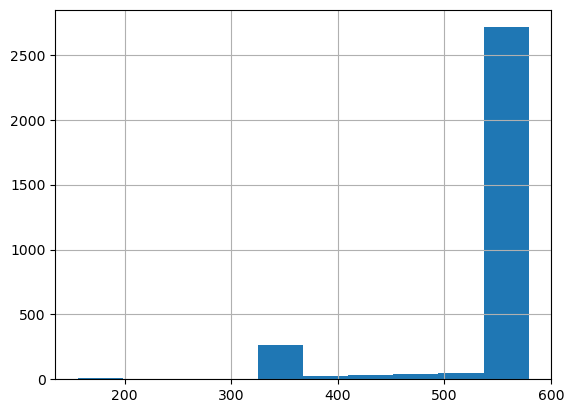

oneweb
Apogee that are NaN 36 from total of 460
(s: 35, m: 620.9) (s: 1, m: 684.7) (s: 1, m: 748.5) (s: 13, m: 812.3) (s: 374, m: 1195.1) 


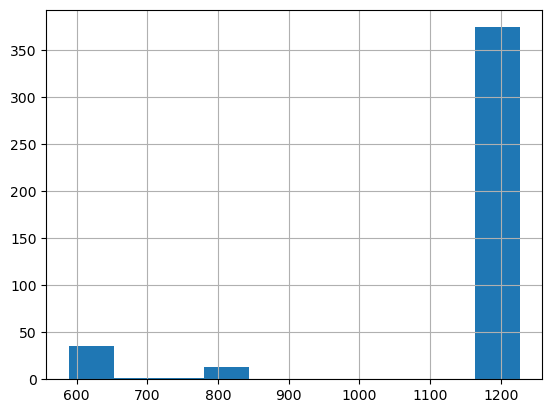

planet
Apogee that are NaN 0 from total of 319
(s: 43, m: 376.5) (s: 70, m: 419.5) (s: 57, m: 462.5) (s: 130, m: 505.5) (s: 2, m: 548.5) (s: 15, m: 591.5) (s: 1, m: 634.5) (s: 1, m: 763.5) 


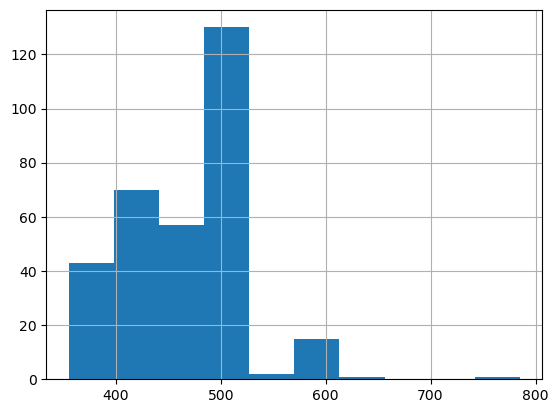

iridium
Apogee that are NaN 0 from total of 75
(s: 3, m: 662.15) (s: 4, m: 748.25) (s: 68, m: 772.85) 


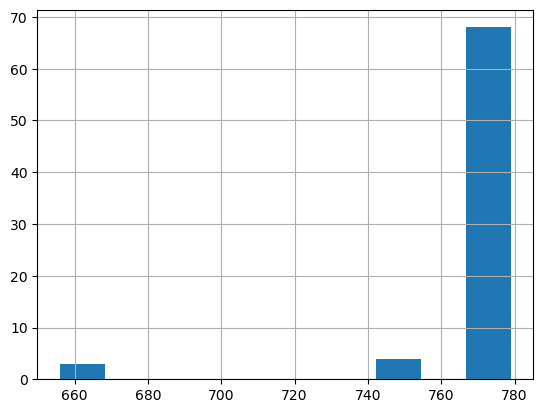

gps
Apogee that are NaN 0 from total of 31
(s: 8, m: 20235.55) (s: 2, m: 20298.65) (s: 6, m: 20361.75) (s: 3, m: 20424.85) (s: 4, m: 20487.95) (s: 5, m: 20551.05) (s: 1, m: 20614.15) (s: 1, m: 20740.35) (s: 1, m: 20803.45) 


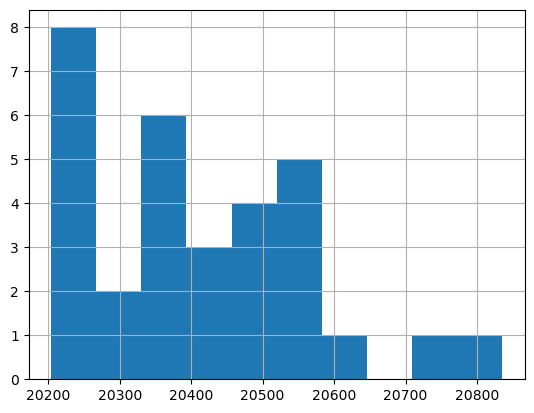

glonass
Apogee that are NaN 0 from total of 24
(s: 3, m: 19133.7) (s: 1, m: 19139.1) (s: 1, m: 19144.5) (s: 5, m: 19149.9) (s: 4, m: 19155.3) (s: 3, m: 19160.7) (s: 1, m: 19166.1) (s: 1, m: 19171.5) (s: 2, m: 19176.9) (s: 3, m: 19182.3) 


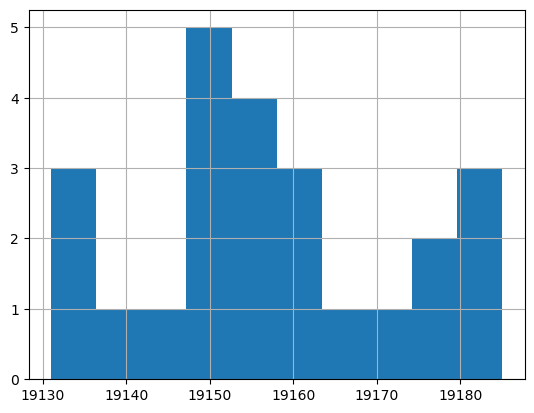

meteosat
Apogee that are NaN 0 from total of 3
(s: 1, m: 35787.45) (s: 1, m: 35791.05) (s: 1, m: 35795.55) 


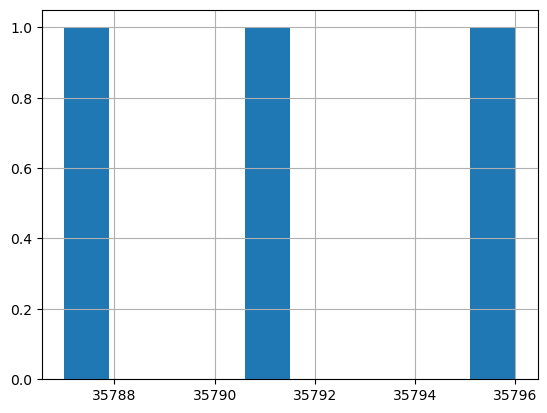

intelsat
Apogee that are NaN 0 from total of 159
(s: 3, m: 35697.9) (s: 3, m: 35756.9) (s: 100, m: 35792.3) (s: 53, m: 35804.1) 


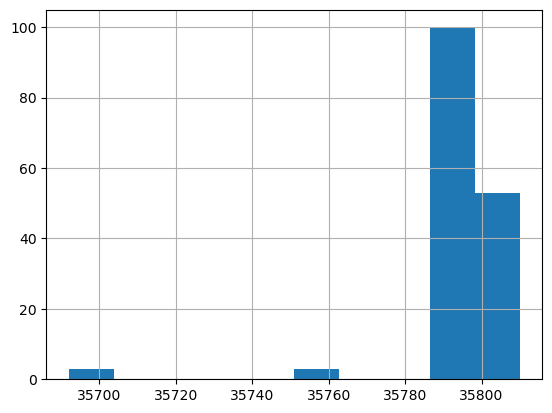

ses
Apogee that are NaN 0 from total of 43
(s: 2, m: 35789.95) (s: 2, m: 35791.850000000006) (s: 5, m: 35793.75) (s: 5, m: 35795.649999999994) (s: 10, m: 35797.55) (s: 9, m: 35799.45) (s: 5, m: 35801.350000000006) (s: 1, m: 35803.25) (s: 3, m: 35805.149999999994) (s: 1, m: 35807.05) 


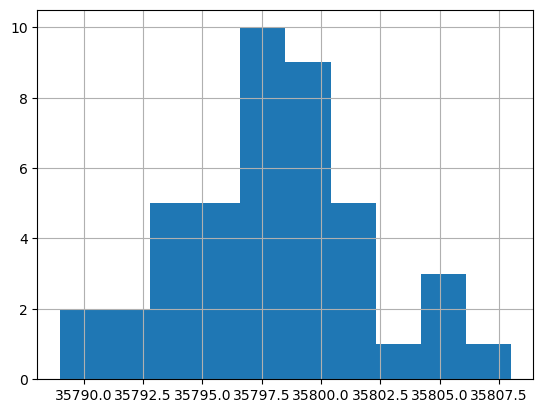

telesat
Apogee that are NaN 0 from total of 21
(s: 1, m: 2736.35) (s: 20, m: 34080.65) 


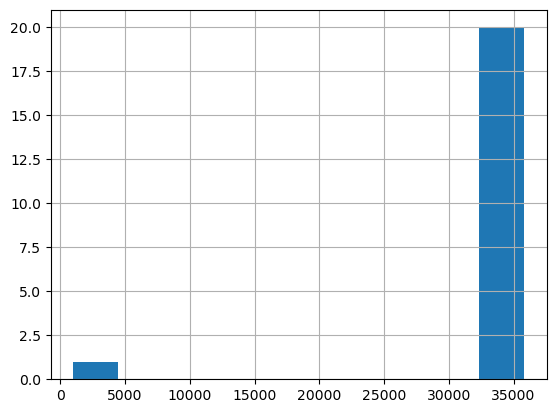

orbcomm
Apogee that are NaN 0 from total of 17
(s: 2, m: 699.75) (s: 13, m: 717.25) (s: 1, m: 752.25) (s: 1, m: 857.25) 


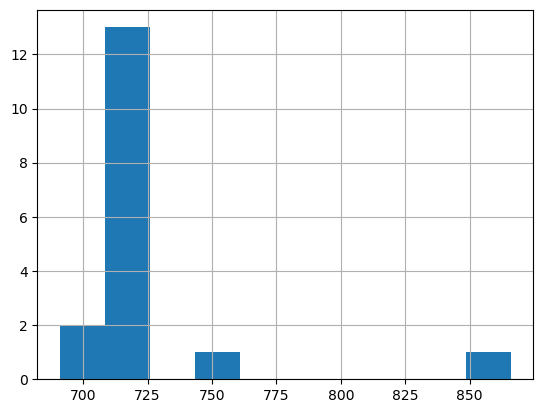

In [14]:
for c in df_dict:
    print(c)
    nas = df_dict[c].dropna(subset=["APOGEE"]).index
    print("Apogee that are NaN", len(df_dict[c]) - len(nas), "from total of", len(df_dict[c]))
    hist, edges = np.histogram(df_dict[c].dropna(subset=["APOGEE"])["APOGEE"], bins=10)
    size_mean = []
    for i in range(len(hist)):
        if(hist[i] > 0):
            #print("Bin of size", hist[i], "From {} to {}".format(edges[i], edges[i+1]))
            size_mean.append((hist[i], (edges[i] + edges[i+1]) / 2))
    for s, m in size_mean:
        print("(s: {}, m: {}) ".format(s, m), end="")
    print("")
    #print("histlen", len(hist), "edgelen", len(edges))
    df_dict[c].dropna(subset=["APOGEE"])["APOGEE"].hist(bins=10)
    plt.show()

## RAAN Histogram

starlink
(s: 39, m: 2.415866) (s: 20, m: 5.995998) (s: 40, m: 9.57613) (s: 19, m: 13.156262) (s: 20, m: 16.736394) (s: 21, m: 20.316526000000003) (s: 20, m: 23.896658000000002) (s: 40, m: 27.47679) (s: 65, m: 31.056922) (s: 55, m: 34.63705399999999) (s: 20, m: 38.217186) (s: 44, m: 41.797318) (s: 25, m: 45.377449999999996) (s: 26, m: 48.957582) (s: 51, m: 52.537713999999994) (s: 21, m: 56.117846) (s: 40, m: 59.69797799999999) (s: 21, m: 63.27811) (s: 41, m: 66.85824199999999) (s: 23, m: 70.438374) (s: 39, m: 74.018506) (s: 42, m: 77.598638) (s: 21, m: 81.17876999999999) (s: 45, m: 84.758902) (s: 20, m: 88.339034) (s: 88, m: 91.91916599999999) (s: 22, m: 95.499298) (s: 38, m: 99.07943) (s: 26, m: 102.659562) (s: 22, m: 106.23969399999999) (s: 41, m: 109.81982599999999) (s: 23, m: 113.399958) (s: 40, m: 116.98008999999999) (s: 21, m: 120.560222) (s: 45, m: 124.140354) (s: 26, m: 127.720486) (s: 21, m: 131.300618) (s: 44, m: 134.88074999999998) (s: 20, m: 138.460882) (s: 45, m: 142.041014

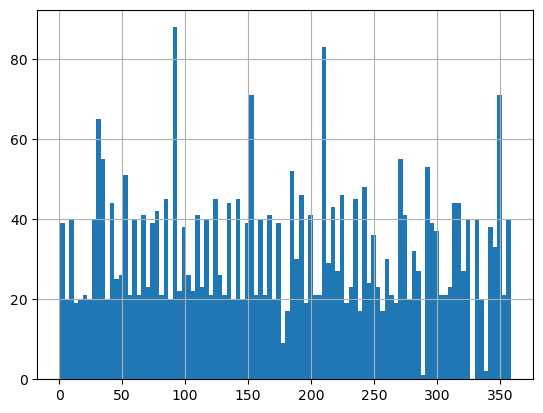

oneweb
(s: 37, m: 127.8242095) (s: 39, m: 157.3765135) (s: 20, m: 172.1526655) (s: 11, m: 173.9996845) (s: 42, m: 186.9288175) (s: 1, m: 188.7758365) (s: 13, m: 203.5519885) (s: 30, m: 205.3990075) (s: 50, m: 218.3281405) (s: 14, m: 233.1042925) (s: 25, m: 236.7983305) (s: 1, m: 240.4923685) (s: 50, m: 247.8804445) (s: 36, m: 262.6565965) (s: 41, m: 279.2797675) (s: 49, m: 294.05591949999996) (s: 1, m: 310.67909050000003) 


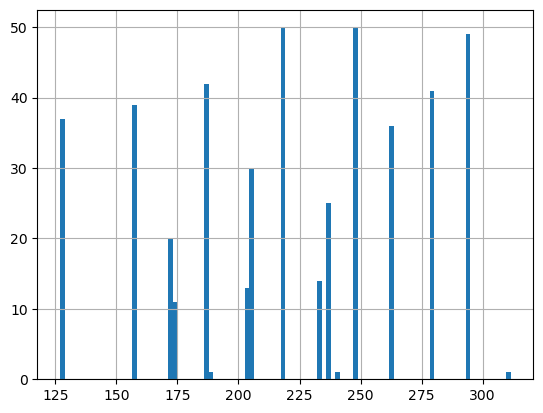

planet
(s: 50, m: 28.529411000000003) (s: 26, m: 31.631833) (s: 16, m: 34.734255000000005) (s: 82, m: 37.836677) (s: 47, m: 40.939099) (s: 19, m: 44.041521) (s: 22, m: 47.143943) (s: 5, m: 50.246365) (s: 1, m: 53.348787) (s: 7, m: 62.656053) (s: 2, m: 65.758475) (s: 1, m: 71.963319) (s: 2, m: 84.373007) (s: 2, m: 87.47542899999999) (s: 5, m: 90.577851) (s: 1, m: 93.680273) (s: 1, m: 208.469887) (s: 8, m: 220.879575) (s: 4, m: 223.981997) (s: 1, m: 236.39168499999997) (s: 1, m: 242.596529) (s: 2, m: 245.698951) (s: 1, m: 279.825593) (s: 4, m: 282.92801499999996) (s: 4, m: 286.030437) (s: 1, m: 292.235281) (s: 1, m: 298.44012499999997) (s: 1, m: 332.566767) (s: 2, m: 335.66918899999996) 


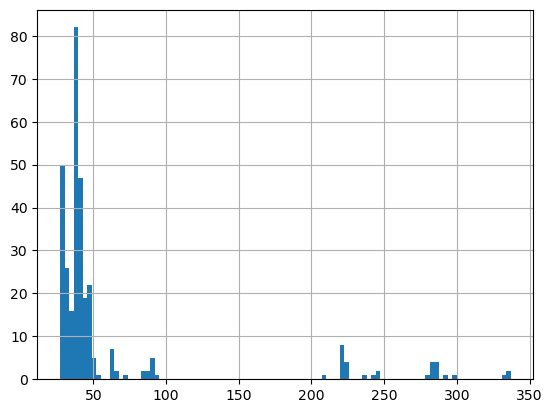

iridium
(s: 12, m: 112.96818400000001) (s: 1, m: 142.987576) (s: 11, m: 144.567544) (s: 3, m: 174.586936) (s: 11, m: 176.166904) (s: 11, m: 206.18629600000003) (s: 1, m: 207.766264) (s: 12, m: 237.78565600000002) (s: 13, m: 269.385016) 


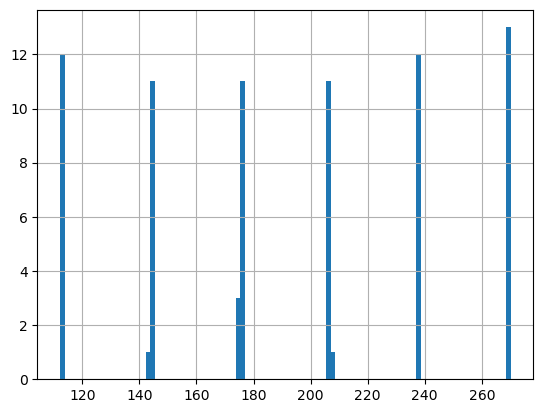

gps
(s: 2, m: 18.1381525) (s: 3, m: 21.2470575) (s: 1, m: 24.3559625) (s: 1, m: 70.98953749999998) (s: 4, m: 80.31625249999999) (s: 1, m: 133.16763749999998) (s: 2, m: 139.3854475) (s: 1, m: 142.4943525) (s: 1, m: 145.60325749999998) (s: 1, m: 148.71216249999998) (s: 1, m: 195.34573749999998) (s: 3, m: 201.56354749999997) (s: 1, m: 257.52383749999996) (s: 1, m: 260.63274249999995) (s: 1, m: 263.7416475) (s: 2, m: 266.85055249999994) (s: 2, m: 319.7019375) (s: 3, m: 325.91974749999997) 


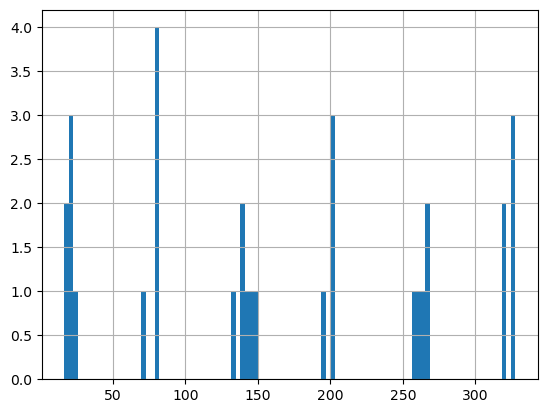

glonass
(s: 1, m: 1.8001124999999998) (s: 8, m: 116.95611249999999) (s: 7, m: 235.7107375) (s: 8, m: 358.0639875) 


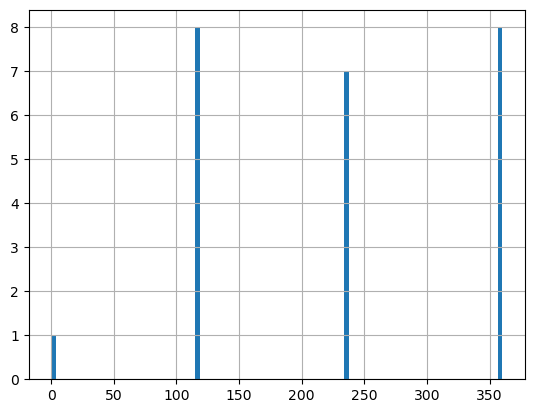

meteosat
(s: 1, m: 50.80852899999999) (s: 1, m: 65.81881899999999) (s: 1, m: 348.012271) 


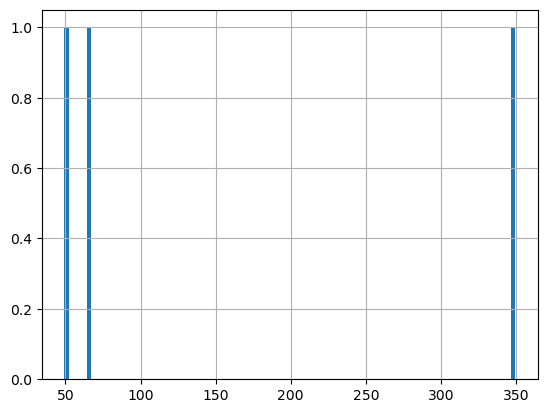

intelsat
(s: 3, m: 1.816187) (s: 1, m: 5.368561) (s: 1, m: 12.473308999999999) (s: 1, m: 19.578056999999998) (s: 2, m: 26.682805) (s: 1, m: 30.235179000000002) (s: 2, m: 40.892300999999996) (s: 1, m: 51.549423) (s: 1, m: 55.101797) (s: 6, m: 58.654171) (s: 1, m: 65.75891899999999) (s: 3, m: 72.86366699999999) (s: 1, m: 76.416041) (s: 2, m: 79.968415) (s: 15, m: 83.52078900000001) (s: 9, m: 87.073163) (s: 7, m: 90.62553700000001) (s: 8, m: 94.177911) (s: 2, m: 97.73028500000001) (s: 1, m: 101.282659) (s: 1, m: 104.83503300000001) (s: 4, m: 108.387407) (s: 2, m: 111.93978100000001) (s: 5, m: 115.492155) (s: 2, m: 119.04452900000001) (s: 1, m: 122.596903) (s: 1, m: 126.14927700000001) (s: 2, m: 129.701651) (s: 1, m: 133.25402499999998) (s: 2, m: 136.806399) (s: 5, m: 140.35877299999999) (s: 1, m: 158.12064299999997) (s: 1, m: 161.673017) (s: 1, m: 186.53963499999998) (s: 1, m: 193.644383) (s: 1, m: 207.853879) (s: 1, m: 222.063375) (s: 2, m: 243.37761899999998) (s: 1, m: 250.4823669999999

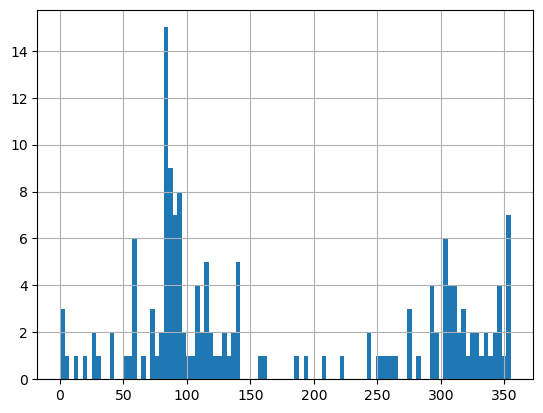

ses
(s: 2, m: 3.4082774999999996) (s: 1, m: 24.8796075) (s: 1, m: 28.458162499999997) (s: 1, m: 32.036717499999995) (s: 1, m: 39.1938275) (s: 1, m: 42.77238249999999) (s: 1, m: 53.50804749999999) (s: 2, m: 57.0866025) (s: 1, m: 60.66515749999999) (s: 2, m: 67.8222675) (s: 2, m: 71.4008225) (s: 1, m: 74.9793775) (s: 3, m: 78.55793249999999) (s: 1, m: 82.13648749999999) (s: 2, m: 85.7150425) (s: 2, m: 89.29359749999999) (s: 1, m: 92.8721525) (s: 1, m: 103.60781749999998) (s: 1, m: 239.59290749999997) (s: 1, m: 257.4856825) (s: 1, m: 278.9570125) (s: 1, m: 293.2712325) (s: 1, m: 304.00689750000004) (s: 2, m: 314.74256249999996) (s: 3, m: 318.3211175) (s: 1, m: 321.89967249999995) (s: 1, m: 336.21389250000004) (s: 1, m: 350.5281125) (s: 2, m: 354.10666749999996) (s: 2, m: 357.6852225) 


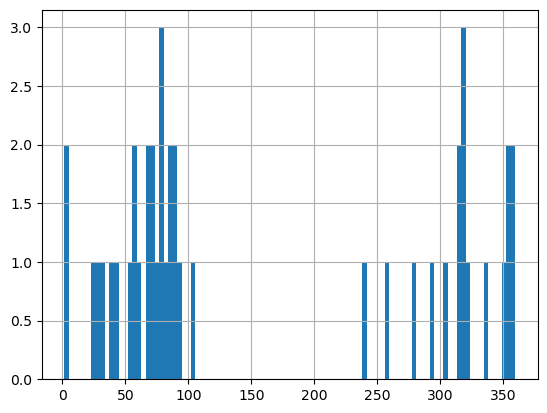

telesat
(s: 1, m: 26.7078865) (s: 1, m: 36.1482055) (s: 1, m: 42.441751499999995) (s: 1, m: 45.588524500000005) (s: 1, m: 48.7352975) (s: 1, m: 64.4691625) (s: 2, m: 67.6159355) (s: 2, m: 70.7627085) (s: 1, m: 89.6433465) (s: 4, m: 92.7901195) (s: 1, m: 180.8997635) (s: 1, m: 287.89004550000004) (s: 1, m: 325.6513215) (s: 2, m: 331.9448675) (s: 1, m: 338.2384135) 


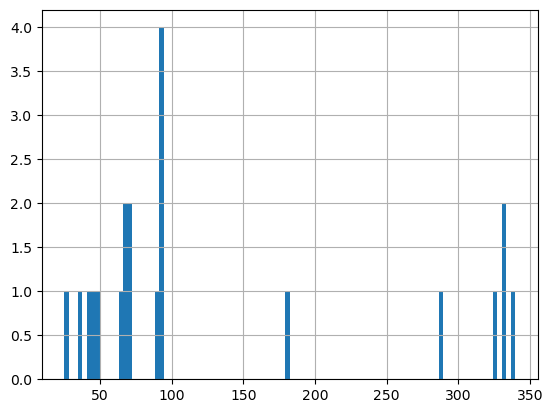

orbcomm
(s: 3, m: 4.233356) (s: 3, m: 93.34866799999999) (s: 1, m: 117.34125199999998) (s: 1, m: 144.761348) (s: 2, m: 182.46398) (s: 1, m: 192.74651599999999) (s: 4, m: 271.579292) (s: 1, m: 340.129532) (s: 1, m: 343.557044) 


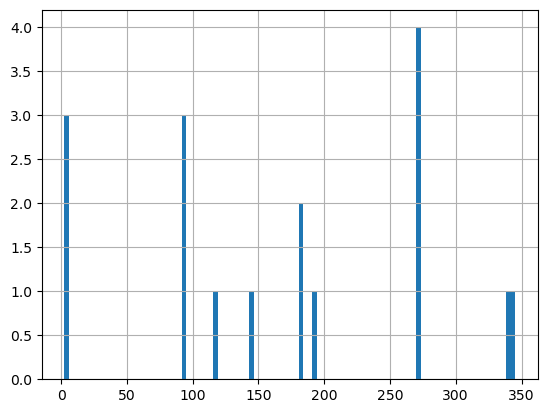

In [17]:
for c in df_dict:
    print(c)
    hist, edges = np.histogram(df_dict[c]["RA_OF_ASC_NODE"], bins=100)
    size_mean = []
    for i in range(len(hist)):
        if(hist[i] > 0):
            #print("Bin of size", hist[i], "From {} to {}".format(edges[i], edges[i+1]))
            size_mean.append((hist[i], (edges[i] + edges[i+1]) / 2))
    for s, m in size_mean:
        print("(s: {}, m: {}) ".format(s, m), end="")
    print("")
    #print("histlen", len(hist), "edgelen", len(edges))
    df_dict[c]["RA_OF_ASC_NODE"].hist(bins=100)
    plt.show()

## Inclination Histogram

starlink
(s: 3010, m: 53.220714) (s: 51, m: 70.192578) (s: 187, m: 97.436886) 


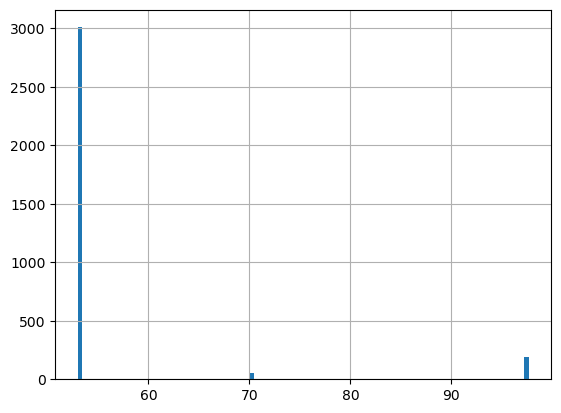

oneweb
(s: 5, m: 87.054576) (s: 1, m: 87.063728) (s: 8, m: 87.219312) (s: 14, m: 87.228464) (s: 3, m: 87.237616) (s: 1, m: 87.30167999999999) (s: 4, m: 87.448112) (s: 7, m: 87.457264) (s: 11, m: 87.466416) (s: 9, m: 87.475568) (s: 4, m: 87.48472) (s: 2, m: 87.493872) (s: 2, m: 87.539632) (s: 2, m: 87.686064) (s: 1, m: 87.704368) (s: 1, m: 87.722672) (s: 1, m: 87.84164799999999) (s: 9, m: 87.869104) (s: 63, m: 87.878256) (s: 22, m: 87.887408) (s: 72, m: 87.89656) (s: 154, m: 87.905712) (s: 19, m: 87.914864) (s: 30, m: 87.924016) (s: 6, m: 87.933168) (s: 9, m: 87.960624) 


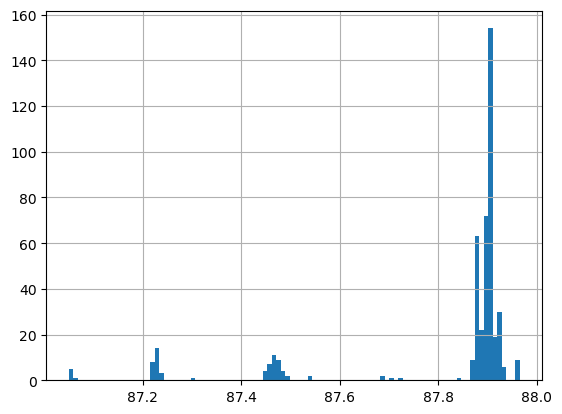

planet
(s: 6, m: 53.21239) (s: 1, m: 65.01586999999999) (s: 296, m: 97.24844999999999) (s: 5, m: 97.70242999999999) (s: 12, m: 98.15641) 


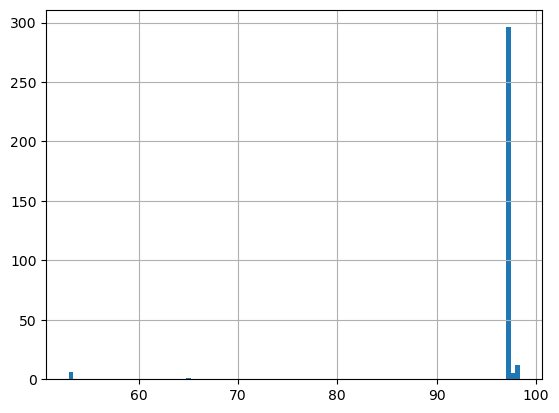

iridium
(s: 25, m: 86.3949925) (s: 8, m: 86.3971775) (s: 22, m: 86.3993625) (s: 12, m: 86.4015475) (s: 1, m: 86.4277675) (s: 4, m: 86.4474325) (s: 3, m: 86.6113075) 


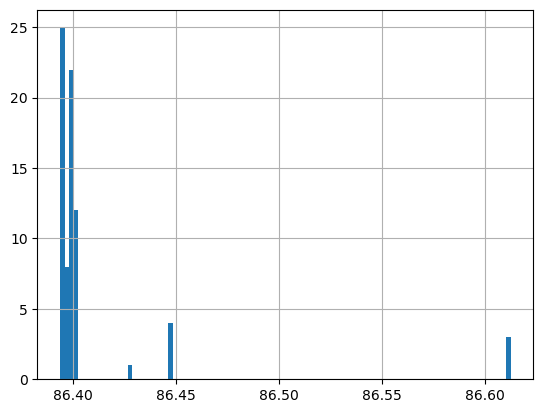

gps
(s: 1, m: 53.378038000000004) (s: 1, m: 53.510341999999994) (s: 2, m: 53.609570000000005) (s: 1, m: 54.204938) (s: 2, m: 54.469545999999994) (s: 2, m: 54.701077999999995) (s: 1, m: 54.734154000000004) (s: 1, m: 54.93261) (s: 2, m: 55.064914) (s: 2, m: 55.131066000000004) (s: 1, m: 55.19721800000001) (s: 1, m: 55.263369999999995) (s: 2, m: 55.395674) (s: 1, m: 55.428749999999994) (s: 1, m: 55.527978000000004) (s: 1, m: 55.59413) (s: 1, m: 55.660281999999995) (s: 1, m: 55.759510000000006) (s: 1, m: 55.891814) (s: 1, m: 55.924890000000005) (s: 2, m: 55.957966) (s: 1, m: 56.090270000000004) (s: 1, m: 56.619485999999995) (s: 1, m: 56.652562) 


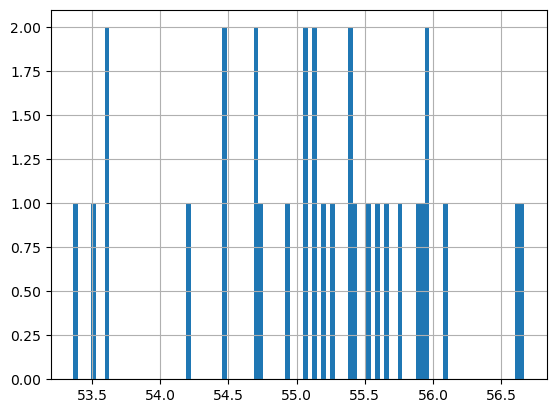

glonass
(s: 1, m: 63.6795855) (s: 1, m: 64.1388345) (s: 1, m: 64.3322025) (s: 1, m: 64.35637349999999) (s: 2, m: 64.3805445) (s: 2, m: 64.4047155) (s: 1, m: 64.64642549999999) (s: 3, m: 64.6947675) (s: 1, m: 64.7672805) (s: 1, m: 64.81562249999999) (s: 1, m: 64.8397935) (s: 1, m: 64.9123065) (s: 1, m: 64.9848195) (s: 1, m: 65.0089905) (s: 1, m: 65.56492349999999) (s: 1, m: 65.7582915) (s: 1, m: 65.8308045) (s: 1, m: 65.9274885) (s: 2, m: 66.0725145) 


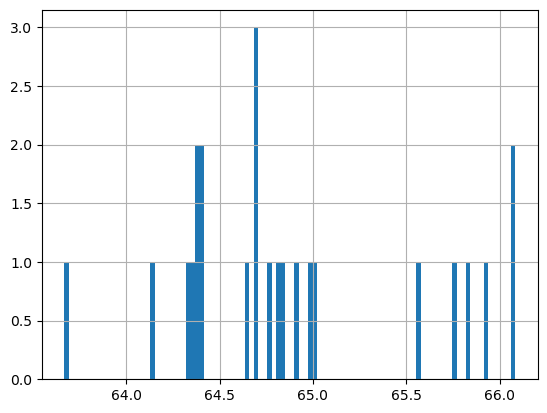

meteosat
(s: 1, m: 0.5212875) (s: 1, m: 1.7555625) (s: 1, m: 6.3400125) 


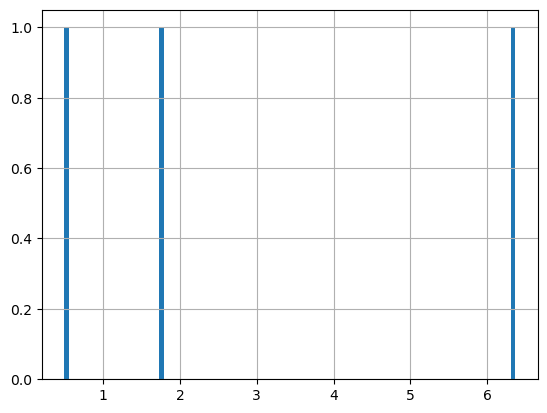

intelsat
(s: 114, m: 0.037803) (s: 5, m: 0.18901500000000002) (s: 2, m: 0.34022700000000006) (s: 3, m: 1.6255290000000002) (s: 3, m: 2.4571950000000005) (s: 2, m: 2.7596190000000003) (s: 2, m: 2.8352250000000003) (s: 1, m: 3.3644670000000003) (s: 5, m: 3.440073) (s: 2, m: 3.591285) (s: 4, m: 3.6668910000000006) (s: 2, m: 4.044921) (s: 2, m: 4.120527000000001) (s: 2, m: 4.800981) (s: 3, m: 5.935071000000001) (s: 6, m: 7.522797000000001) 


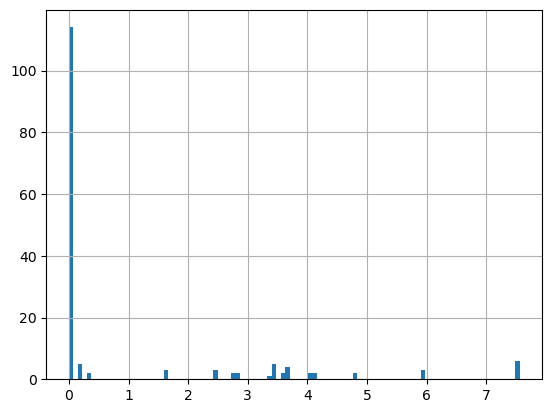

ses
(s: 31, m: 0.041710500000000005) (s: 1, m: 1.8998145) (s: 1, m: 1.9772355) (s: 1, m: 2.8288665) (s: 1, m: 3.2159715) (s: 1, m: 3.8353395000000003) (s: 1, m: 4.919233500000001) (s: 1, m: 4.9966545) (s: 1, m: 6.0031275) (s: 1, m: 6.3128115000000005) (s: 1, m: 6.622495500000001) (s: 1, m: 7.628968500000001) (s: 1, m: 7.7063895) 


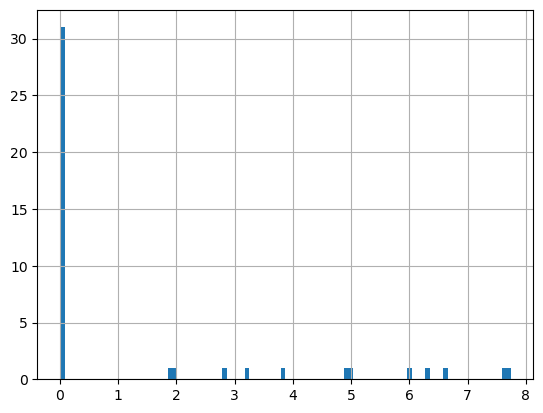

telesat
(s: 15, m: 0.4973175) (s: 1, m: 1.4897525000000003) (s: 1, m: 2.4821875) (s: 1, m: 3.4746225000000006) (s: 1, m: 6.4519275) (s: 1, m: 12.4065375) (s: 1, m: 98.7483825) 


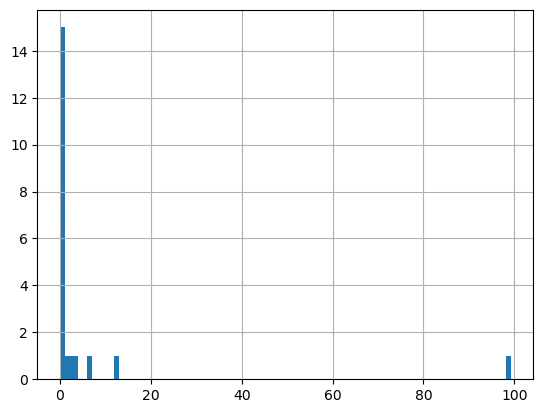

orbcomm
(s: 1, m: 20.0975055) (s: 16, m: 46.9275945) 


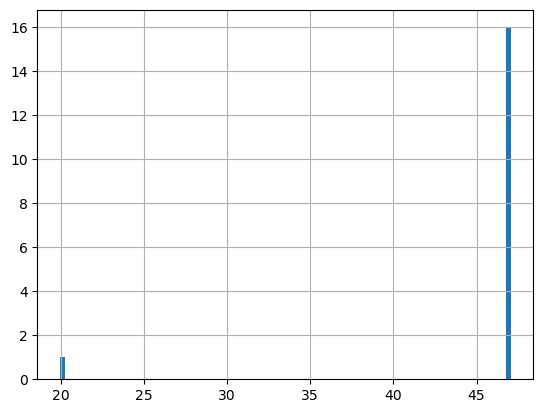

In [35]:
for c in df_dict:
    print(c)
    hist, edges = np.histogram(df_dict[c]["INCLINATION"], bins=100)
    size_mean = []
    for i in range(len(hist)):
        if(hist[i] > 0):
            #print("Bin of size", hist[i], "From {} to {}".format(edges[i], edges[i+1]))
            size_mean.append((hist[i], (edges[i] + edges[i+1]) / 2))
    for s, m in size_mean:
        print("(s: {}, m: {}) ".format(s, m), end="")
    print("")
    #print("histlen", len(hist), "edgelen", len(edges))
    df_dict[c]["INCLINATION"].hist(bins=100)
    plt.show()

## Launch Year Histogram

starlink
Bin of size 49 From 2019.0 to 2019.06
Bin of size 705 From 2019.96 to 2020.02
Bin of size 941 From 2020.98 to 2021.04
Bin of size 1553 From 2021.94 to 2022.0


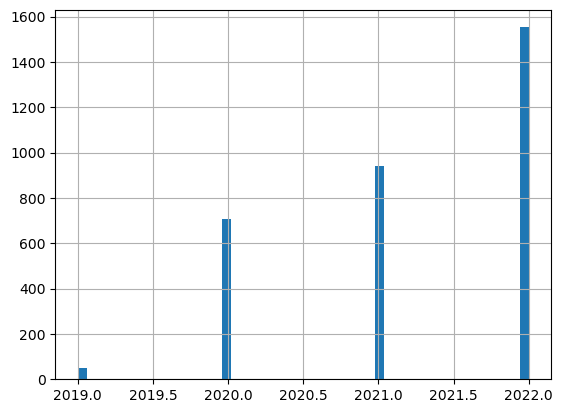

oneweb
Bin of size 6 From 2019.0 to 2019.06
Bin of size 103 From 2019.96 to 2020.02
Bin of size 282 From 2020.98 to 2021.04
Bin of size 69 From 2021.94 to 2022.0


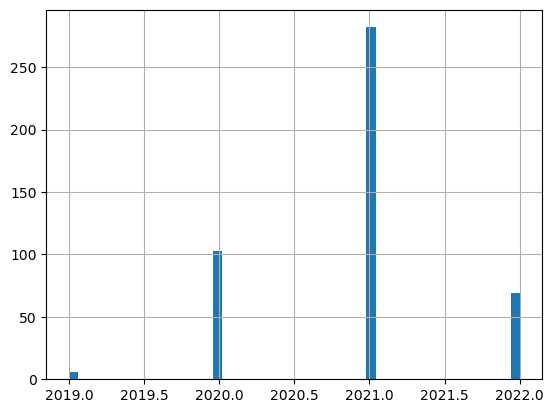

planet
Bin of size 3 From 2013.0 to 2013.18
Bin of size 12 From 2013.9 to 2014.08
Bin of size 15 From 2015.88 to 2016.06
Bin of size 95 From 2016.96 to 2017.14
Bin of size 30 From 2017.86 to 2018.04
Bin of size 32 From 2018.94 to 2019.12
Bin of size 41 From 2019.84 to 2020.02
Bin of size 48 From 2020.92 to 2021.1
Bin of size 44 From 2021.82 to 2022.0


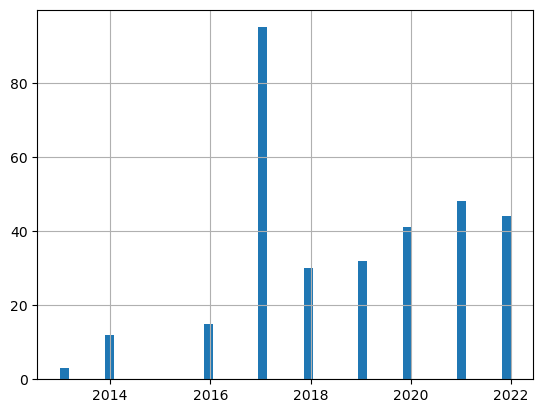

iridium
Bin of size 40 From 2017.0 to 2017.04
Bin of size 25 From 2018.0 to 2018.04
Bin of size 10 From 2018.96 to 2019.0


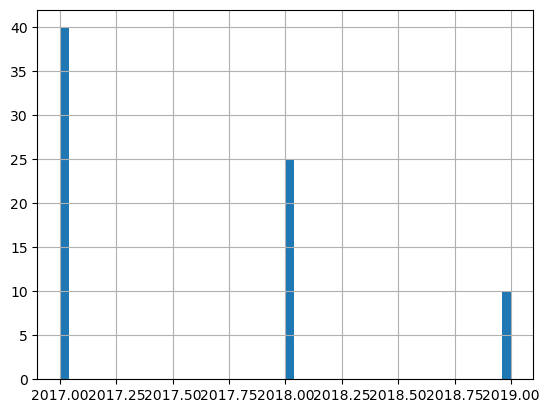

gps
Bin of size 1 From 1997.0 to 1997.48
Bin of size 2 From 1999.88 to 2000.36
Bin of size 2 From 2002.76 to 2003.24
Bin of size 2 From 2003.72 to 2004.2
Bin of size 1 From 2004.68 to 2005.16
Bin of size 2 From 2005.64 to 2006.12
Bin of size 2 From 2006.6 to 2007.08
Bin of size 1 From 2007.56 to 2008.04
Bin of size 1 From 2009.0 to 2009.48
Bin of size 1 From 2009.96 to 2010.44
Bin of size 1 From 2010.92 to 2011.4
Bin of size 1 From 2011.88 to 2012.36
Bin of size 1 From 2012.84 to 2013.32
Bin of size 4 From 2013.8 to 2014.28
Bin of size 3 From 2014.76 to 2015.24
Bin of size 1 From 2015.72 to 2016.2
Bin of size 1 From 2017.64 to 2018.12
Bin of size 1 From 2018.6 to 2019.08
Bin of size 2 From 2019.56 to 2020.04
Bin of size 1 From 2020.52 to 2021.0


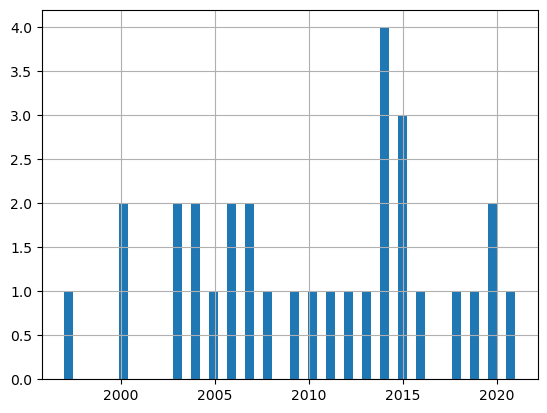

glonass
Bin of size 4 From 2007.0 to 2007.3
Bin of size 2 From 2008.8 to 2009.1
Bin of size 1 From 2010.0 to 2010.3
Bin of size 3 From 2010.9 to 2011.2
Bin of size 1 From 2013.0 to 2013.3
Bin of size 3 From 2013.9 to 2014.2
Bin of size 1 From 2016.0 to 2016.3
Bin of size 1 From 2016.9 to 2017.2
Bin of size 2 From 2017.8 to 2018.1
Bin of size 2 From 2019.0 to 2019.3
Bin of size 3 From 2019.9 to 2020.2
Bin of size 1 From 2021.7 to 2022.0


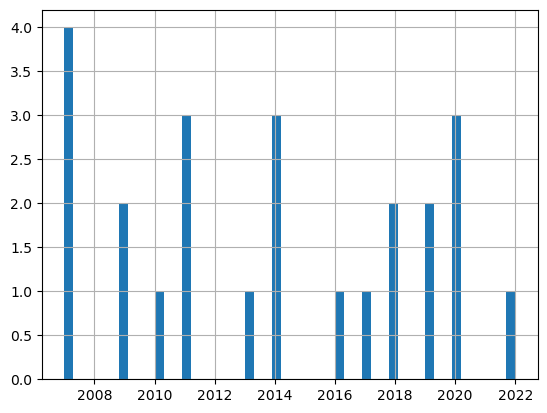

meteosat
Bin of size 1 From 2005.0 to 2005.2
Bin of size 1 From 2012.0 to 2012.2
Bin of size 1 From 2014.8 to 2015.0


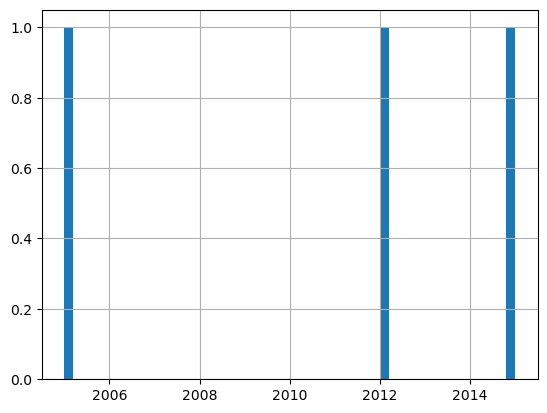

intelsat
Bin of size 7 From 1997.0 to 1997.5
Bin of size 2 From 1999.0 to 1999.5
Bin of size 5 From 2000.0 to 2000.5
Bin of size 9 From 2001.0 to 2001.5
Bin of size 12 From 2002.0 to 2002.5
Bin of size 8 From 2003.0 to 2003.5
Bin of size 2 From 2004.0 to 2004.5
Bin of size 9 From 2005.0 to 2005.5
Bin of size 3 From 2006.0 to 2006.5
Bin of size 9 From 2007.0 to 2007.5
Bin of size 11 From 2008.0 to 2008.5
Bin of size 7 From 2009.0 to 2009.5
Bin of size 6 From 2010.0 to 2010.5
Bin of size 7 From 2011.0 to 2011.5
Bin of size 16 From 2012.0 to 2012.5
Bin of size 3 From 2014.0 to 2014.5
Bin of size 3 From 2015.0 to 2015.5
Bin of size 10 From 2016.0 to 2016.5
Bin of size 9 From 2017.0 to 2017.5
Bin of size 4 From 2018.0 to 2018.5
Bin of size 3 From 2019.0 to 2019.5
Bin of size 4 From 2020.0 to 2020.5
Bin of size 9 From 2021.5 to 2022.0


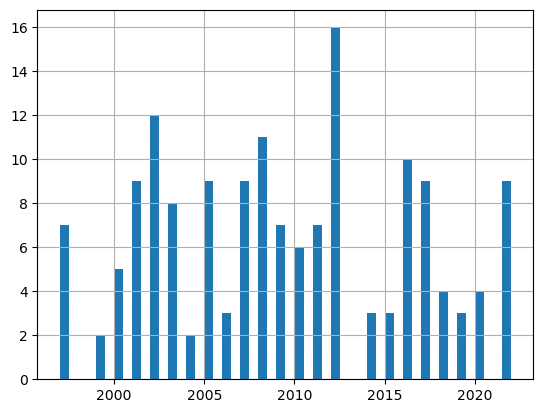

ses
Bin of size 1 From 1996.0 to 1996.44
Bin of size 2 From 1996.88 to 1997.32
Bin of size 1 From 1997.76 to 1998.2
Bin of size 1 From 1998.64 to 1999.08
Bin of size 4 From 1999.96 to 2000.4
Bin of size 1 From 2000.84 to 2001.28
Bin of size 3 From 2001.72 to 2002.16
Bin of size 2 From 2003.92 to 2004.36
Bin of size 1 From 2004.8 to 2005.24
Bin of size 2 From 2005.68 to 2006.12
Bin of size 2 From 2007.0 to 2007.44
Bin of size 2 From 2007.88 to 2008.32
Bin of size 3 From 2008.76 to 2009.2
Bin of size 2 From 2009.64 to 2010.08
Bin of size 3 From 2010.96 to 2011.4
Bin of size 3 From 2011.84 to 2012.28
Bin of size 3 From 2012.72 to 2013.16
Bin of size 2 From 2013.6 to 2014.04
Bin of size 1 From 2015.8 to 2016.24
Bin of size 3 From 2016.68 to 2017.12
Bin of size 1 From 2017.56 to 2018.0


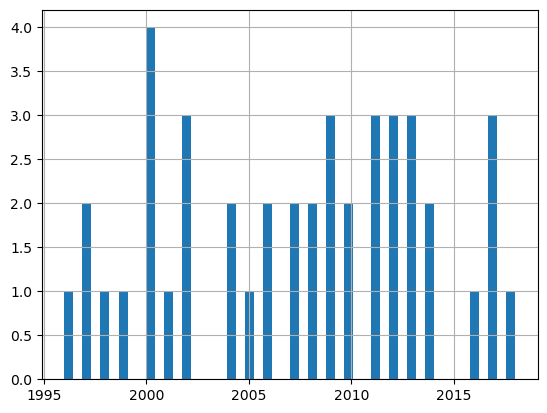

telesat
Bin of size 1 From 1995.0 to 1995.48
Bin of size 1 From 1999.8 to 2000.28
Bin of size 1 From 2001.72 to 2002.2
Bin of size 1 From 2003.64 to 2004.12
Bin of size 2 From 2004.6 to 2005.08
Bin of size 1 From 2007.0 to 2007.48
Bin of size 1 From 2007.96 to 2008.44
Bin of size 3 From 2008.92 to 2009.4
Bin of size 1 From 2009.88 to 2010.36
Bin of size 1 From 2010.84 to 2011.32
Bin of size 1 From 2011.8 to 2012.28
Bin of size 1 From 2012.76 to 2013.24
Bin of size 1 From 2014.68 to 2015.16
Bin of size 1 From 2016.6 to 2017.08
Bin of size 3 From 2017.56 to 2018.04
Bin of size 1 From 2018.52 to 2019.0


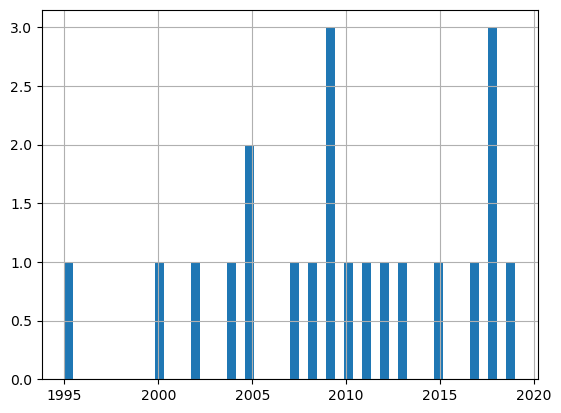

orbcomm
Bin of size 1 From 2011.0 to 2011.08
Bin of size 5 From 2013.96 to 2014.04
Bin of size 11 From 2014.92 to 2015.0


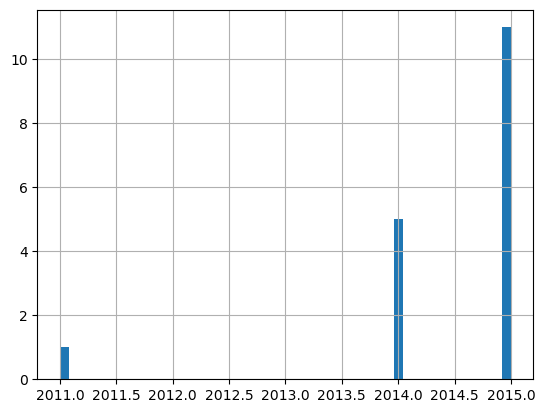

In [26]:
import numpy as np
import matplotlib.pyplot as plt
for c in df_dict:
    print(c)
    hist, edges = np.histogram(df_dict[c]["LAUNCH_YEAR"], bins=50)
    for i in range(len(hist)):
        if(hist[i] > 0):
            print("Bin of size", hist[i], "From {} to {}".format(edges[i], edges[i+1]))
    #print("histlen", len(hist), "edgelen", len(edges))
    df_dict[c]["LAUNCH_YEAR"].hist(bins=50)
    plt.show()

## Clustering of Orbital Planes

In [71]:
from scipy.cluster.vq import whiten, kmeans, vq, kmeans2

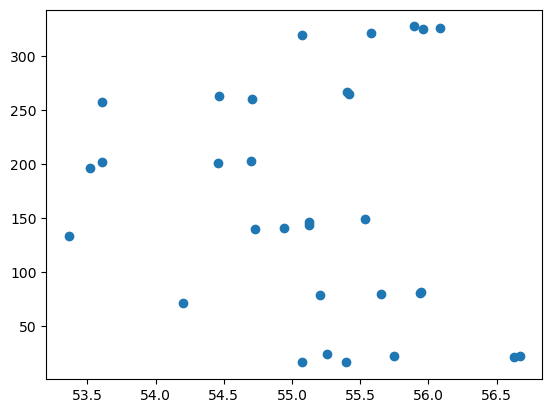

In [97]:
plt.scatter(df_dict["gps"]["INCLINATION"],
            df_dict["gps"]["RA_OF_ASC_NODE"])

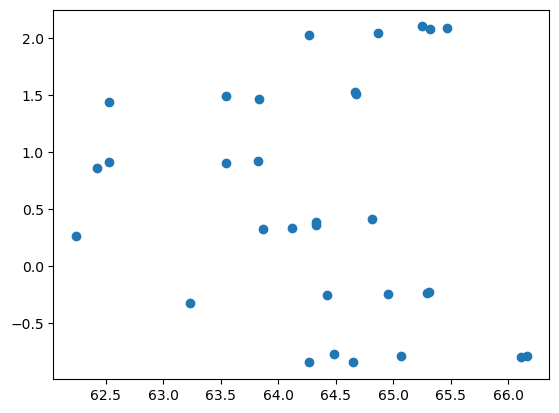

In [98]:
plt.scatter([p[0] for p in data_norm], [p[1] for p in data_norm])

In [145]:
data = np.array([z for z in zip(
            df_dict["starlink"]["INCLINATION"],
            df_dict["starlink"]["RA_OF_ASC_NODE"])])

dm = []
for k in range(20):
    
    data_std = data.std(axis=0)
    data_mean = data.std(axis=0)
    data_norm = (data-data_mean) / data_std
    data_norm = data

    # assign centroids and clusters
    centroids, clusters = kmeans(data_norm, k+1)
    clusters, distances = vq(data_norm, centroids)

    #print("Centroids :\n", (centroids * data_std) + data_mean, "\n")
    #print("Cluster index :", clusters, "\n")
    #print("Distance from the centroids :", distances.mean())
    dm.append(distances.mean())
    

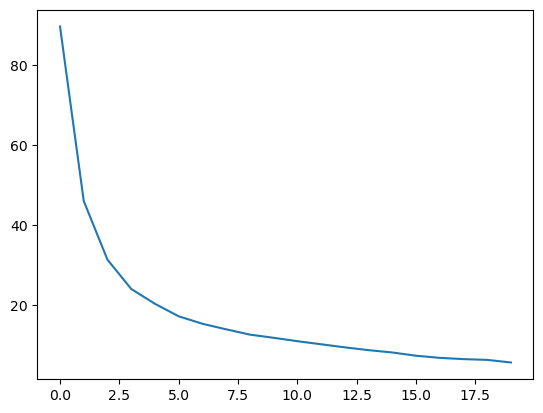

In [146]:
plt.plot(dm)

In [147]:
data

array([[ 53.0546, 160.6646],
       [ 53.0528, 160.5935],
       [ 53.0527, 160.6581],
       ...,
       [ 53.2165, 348.071 ],
       [ 53.2161, 347.2932],
       [ 53.2158, 348.0644]])

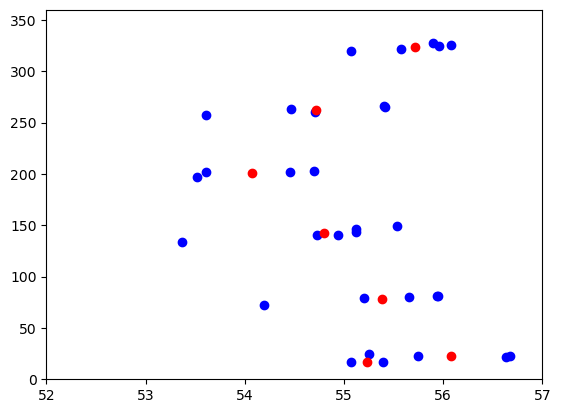

In [139]:
plt.xlim(52, 57)
plt.ylim(0, 360)
plt.scatter([p[0] for p in data], [p[1] for p in data], color="blue")
plt.scatter([p[0] for p in centroids], [p[1] for p in centroids], color="red")

## asd

Class 0


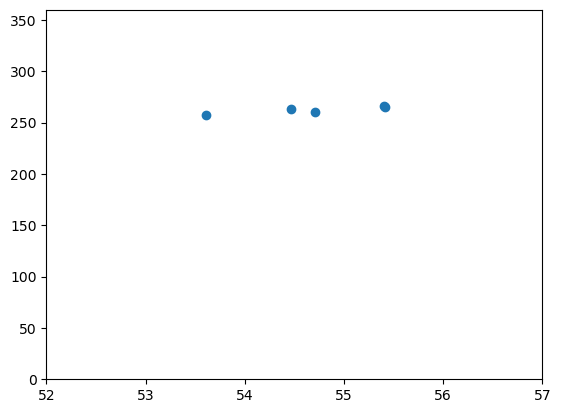

Class 1


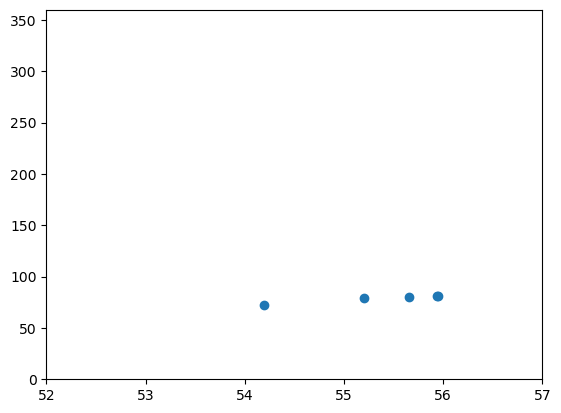

Class 2


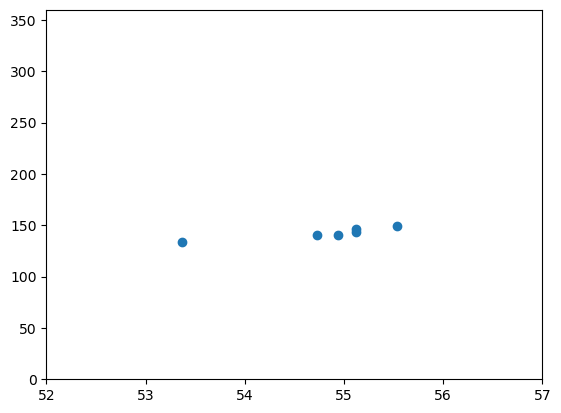

Class 3


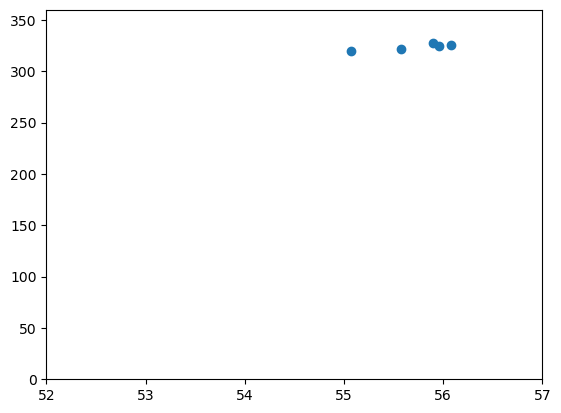

Class 4


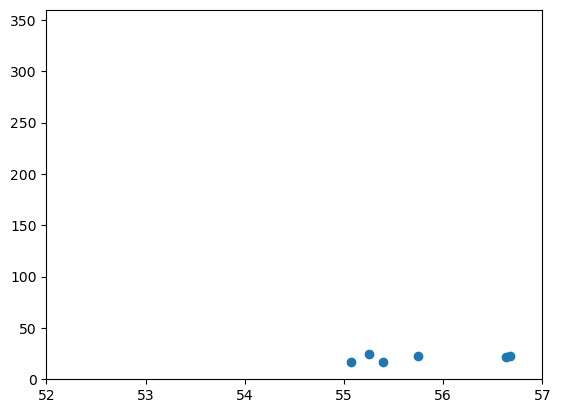

Class 5


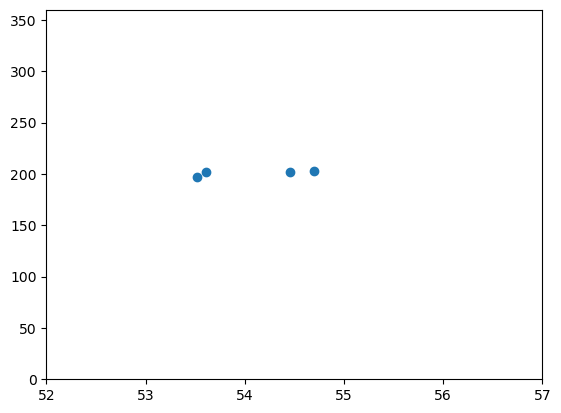

In [128]:
for i in range(6):
    print("Class", i)
    indices = []
    for idx, cidx in enumerate(clusters):
        if (cidx == i):
            indices.append(idx)
    x = [data[idx][0] for idx in indices]
    y = [data[idx][1] for idx in indices]
    plt.xlim(52, 57)
    plt.ylim(0, 360)
    plt.scatter(x, y)
    plt.show()